In [1]:
import json # importing json library
import glob # importing glob library
import os # importing OS library
import csv # importing csv
import logging # import logging
import matplotlib.pyplot as plt
import operator # importing operator
from nltk.corpus import stopwords
from collections import Counter  # importing counter
!pip install -U textblob
import nltk
from textblob import TextBlob
import numpy as np

Requirement already up-to-date: textblob in c:\programdata\anaconda3\lib\site-packages
Requirement already up-to-date: nltk>=3.1 in c:\programdata\anaconda3\lib\site-packages (from textblob)
Requirement already up-to-date: six in c:\programdata\anaconda3\lib\site-packages (from nltk>=3.1->textblob)


In [2]:
def getLogger(dir):
    logging.basicConfig(level=logging.INFO)
    logger = logging.getLogger()
    # create a file handler
    handler = logging.FileHandler(fileDir+'/commentsAnalysis.log')
    handler.setLevel(logging.INFO)
    # create a logging format
    formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
    handler.setFormatter(formatter)
    # add the handlers to the logger
    logger.addHandler(handler)
    return logger

In [3]:
fileDir = os.path.dirname(os.path.realpath('__file__'))
logger = getLogger(fileDir)
logger.info("Application started....")
logger.info("Reading JSON files from data folder.")
filenames = sorted(glob.glob(fileDir+'/data/*.json')) # reading all the filenames in the data folder
logger.info(str(len(filenames)) + " number of JSON files found in data folder")

INFO:root:Application started....
INFO:root:Reading JSON files from data folder.
INFO:root:106 number of JSON files found in data folder


In [4]:
comments = []
logger.info("Iterating through all the JSON files.")
for file in filenames:  # iterating through all the files
    #file = 'D:/NEU/Spring2017/Python/midterm/data/20170201.0.json'
    with open(file) as data_file:    
        content = json.load(data_file) # load JSON
        comments.extend(content['results']['comments'])
logger.info(str(len(comments)) + " number of comments files found.")

INFO:root:Iterating through all the JSON files.
INFO:root:2650 number of comments files found.


In [5]:
userList = []
for comment in comments:
    if comment.get("userID") :
        userList.append((comment.get("userID"), comment))

In [6]:
def getName(userId, userList):
    for user, comment in userList:
        if user == userId:
            return comment.get("userDisplayName")

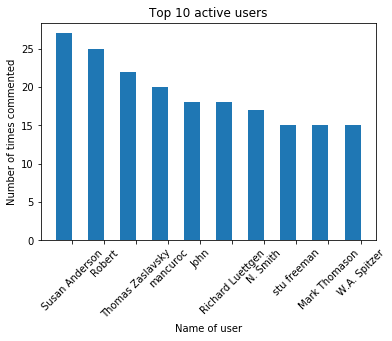

In [13]:
users = [user for (user,comment) in userList]
sortedDict = sorted(dict(Counter(users)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [getName(key, userList) for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times commented')
plt.xlabel('Name of user')
plt.title('Top 10 active users' )
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()

In [19]:
users = [key for key, val in sortedDict][:10]
comments = [comment for (user,comment) in userList if user in users]

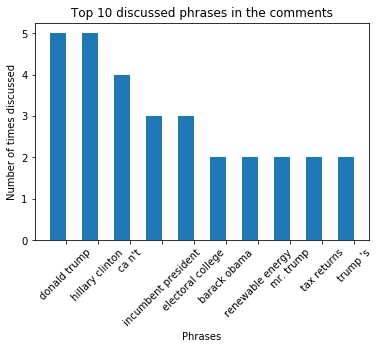

['donald trump', 'hillary clinton', "ca n't", 'incumbent president', 'electoral college', 'barack obama', 'renewable energy', 'mr. trump', 'tax returns', "trump 's"]


In [32]:
names = ['<', '>','https', 'i']
text1 = ''
for comment in comments:
    if comment.get("commentBody") :
        text1 = text1 + (comment.get("commentBody")).lower()
blob = TextBlob(text1)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [key for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times discussed')
plt.xlabel('Phrases')
plt.title('Top 10 discussed phrases in the comments' )
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()

In [10]:
locList = []
for comment in comments:
    if comment.get("userLocation") :
        if comment.get("userLocation") == '<br/>':
            locList.append(('NA', comment))
        else:
            locList.append((comment.get("userLocation"), comment))
    else:
        locList.append(('NA', comment))

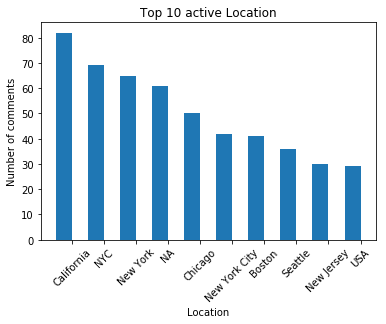

In [34]:
locs = [loc for (loc,comment) in locList]
sortedDict = sorted(dict(Counter(locs)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [key for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of comments')
plt.xlabel('Location')
plt.title('Top 10 active Location' )
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()

In [35]:
users = [key for key, val in sortedDict][:10]
comments = [comment for (user,comment) in locList if user in users]

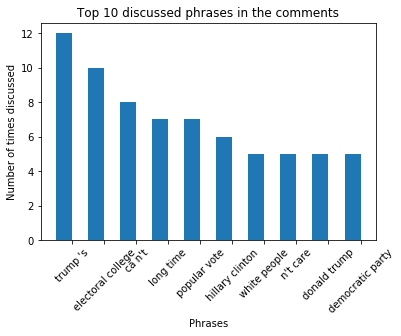

In [37]:
names = ['<', '>','https', 'i', '#']
text1 = ''
for comment in comments:
    if comment.get("commentBody") :
        text1 = text1 + (comment.get("commentBody")).lower()
blob = TextBlob(text1)
filtered_words = [phrase for phrase in blob.noun_phrases if not any(word in names for word in phrase.split())]
sortedDict = sorted(dict(Counter(filtered_words)).items(), key=operator.itemgetter(1), reverse = 1) # sorting wordlist dictionary by value
y = [val for key, val in sortedDict][:10]
labels = [key for key, val in sortedDict][:10]
N = len(y)
x = np.arange(1, N+1)
width = 0.5
plt.bar(x, y, width)
plt.ylabel('Number of times discussed')
plt.xlabel('Phrases')
plt.title('Top 10 discussed phrases in the comments' )
plt.xticks(x + width/2.0, labels)
plt.xticks(rotation=45)
plt.show()